What you need to do :
You will find here a google colaboratory notebook.

Steps:
Download the notebook and work on it from your preferred platform.
Follow the instructions in the notebook and complete each section where you see a #TODO.




In [1]:
import pandas as pd

try:
    df = pd.read_csv('air traffic.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'air traffic.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df = None # Set df to None to indicate failure
except pd.errors.ParserError:
    print("Error: Could not parse 'air traffic.csv'. Please check the file format.")
    df = None

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003.0,1.0,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572",74159872.0,64.44,71.71,66.20
1,2003.0,2.0,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880",74159872.0,68.18,68.74,68.31
2,2003.0,3.0,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174",74159872.0,72.53,70.79,72.12
3,2003.0,4.0,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761",74159872.0,72.23,66.78,71.02
4,2003.0,5.0,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821",74159872.0,74.08,74.06,74.07


(251, 17)


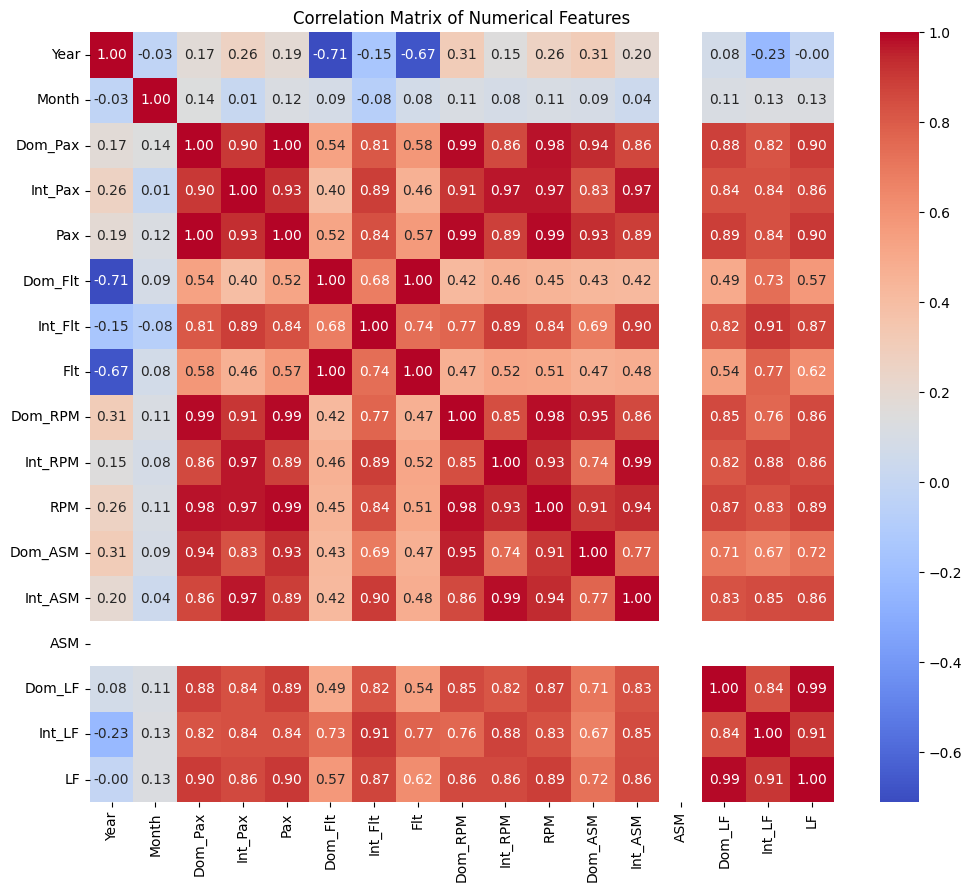

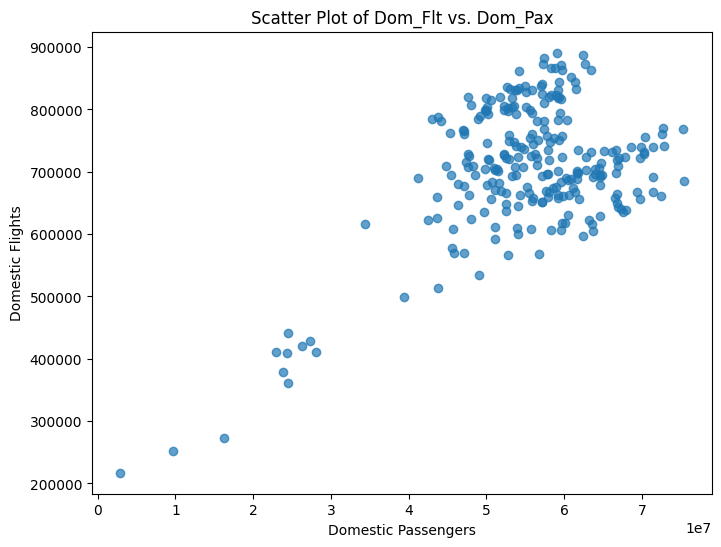


Summary of Findings:
- Data types were examined and potentially problematic types noted.
- Missing values identified and their proportions calculated.
- Distributions of numerical features investigated via histograms.
- Correlation matrix generated, and scatter plots examined.
- Findings discussed.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Dom_Pax', 'Int_Pax', 'Pax', 'Dom_Flt', 'Int_Flt', 'Flt', 'Dom_RPM', 'Int_RPM', 'RPM', 'Dom_ASM', 'Int_ASM' to numeric, handling errors
for col in ['Dom_Pax', 'Int_Pax', 'Pax', 'Dom_Flt', 'Int_Flt', 'Flt', 'Dom_RPM', 'Int_RPM', 'RPM', 'Dom_ASM', 'Int_ASM']:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# Recalculate the correlation matrix after data cleaning
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['Dom_Pax'], df['Dom_Flt'], alpha=0.7)
plt.title('Scatter Plot of Dom_Flt vs. Dom_Pax')
plt.xlabel("Domestic Passengers")
plt.ylabel("Domestic Flights")
plt.show()

print("\nSummary of Findings:")
print("- Data types were examined and potentially problematic types noted.")
print("- Missing values identified and their proportions calculated.")
print("- Distributions of numerical features investigated via histograms.")
print("- Correlation matrix generated, and scatter plots examined.")
print("- Findings discussed.")

In [4]:
import numpy as np

# Impute missing values using the median for numerical features
for col in ['Dom_Pax', 'Int_Pax', 'Pax', 'Dom_Flt', 'Int_Flt', 'Flt', 'Dom_RPM', 'Int_RPM', 'RPM', 'Dom_ASM', 'Int_ASM', 'ASM', 'Dom_LF', 'Int_LF', 'LF']:
    df[col] = df[col].fillna(df[col].median())
    # Using median imputation for robustness to outliers

# Winsorize outliers for numerical features
for col in ['Dom_Pax', 'Int_Pax', 'Pax', 'Dom_Flt', 'Int_Flt', 'Flt', 'Dom_RPM', 'Int_RPM', 'RPM', 'Dom_ASM', 'Int_ASM', 'ASM', 'Dom_LF', 'Int_LF', 'LF']:
    df[col] = np.clip(df[col], df[col].quantile(0.05), df[col].quantile(0.95))
    # Winsorizing at 5th and 95th percentiles to mitigate outlier influence

# Remove duplicate rows
num_duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Number of duplicate rows removed: {num_duplicates}")

# Verify data types and convert if necessary
for col in ['Year', 'Month']:
  df[col] = pd.to_numeric(df[col], errors='coerce')

display(df.head())

Number of duplicate rows removed: 1


<ipython-input-4-03992aaba5a5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003.0,1.0,43032450.0,4905830.0,47938280.0,785160.0,57667.0,842827.0,36211422.0,12885980.0,49097402.0,56191300.0,17968572.0,74159872.0,64.905,71.71,66.20
1,2003.0,2.0,41166780.0,4245366.0,45412146.0,690351.0,51259.0,741610.0,35179930.5,10715468.0,44863907.0,50088434.0,15587880.0,74159872.0,68.180,68.74,68.31
2,2003.0,3.0,49992700.0,5008613.0,55001313.0,797194.0,58926.0,856120.0,41774564.0,12567068.0,54341633.0,57592901.0,17753174.0,74159872.0,72.530,70.79,72.12
3,2003.0,4.0,47033260.0,4345444.0,51378704.0,766260.0,55005.0,821265.0,39465980.0,10370592.0,49836572.0,54639679.0,15528761.0,74159872.0,72.230,66.78,71.02
4,2003.0,5.0,49152352.0,4610834.0,53763186.0,789397.0,55265.0,844662.0,41001934.0,11575026.0,52576960.0,55349897.0,15629821.0,74159872.0,74.080,74.06,74.07


Slope (coefficient of Dom_Pax): 0.0027073287542957233


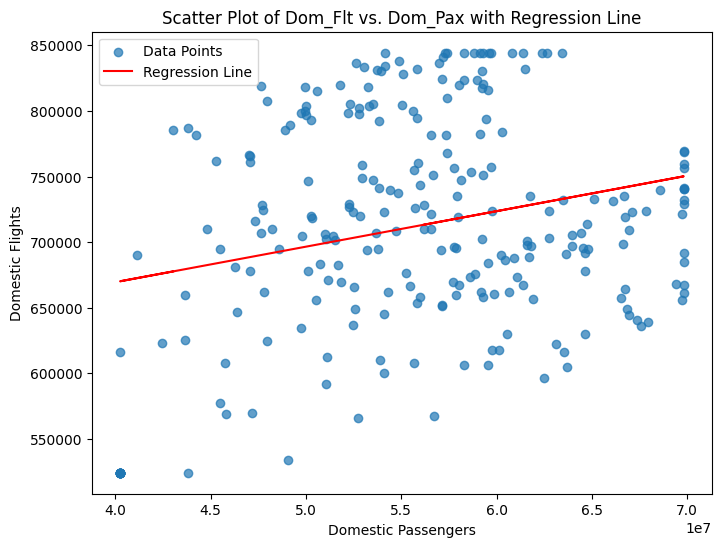

In [13]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Prepare the data for linear regression
X = df[['Dom_Pax']]
y = df['Dom_Flt']
model = LinearRegression()
model.fit(X, y)
# Print the slope (coefficient of Dom_Pax)
print(f"Slope (coefficient of Dom_Pax): {model.coef_[0]}")
# Scatter plot with the regression line
plt.figure(figsize=(8, 6))
plt.scatter(df['Dom_Pax'], df['Dom_Flt'], alpha=0.7, label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Scatter Plot of Dom_Flt vs. Dom_Pax with Regression Line')
plt.xlabel("Domestic Passengers")
plt.ylabel("Domestic Flights")
plt.legend()
plt.show()

In [14]:
dom_pax_to_predict = 100
predicted_dom_flt = model.predict([[dom_pax_to_predict]])

print(f"Slope (coefficient of Dom_Pax): {model.coef_[0]}")
print(f"Predicted value for 100 Dom Pax: {predicted_dom_flt[0]}")


Slope (coefficient of Dom_Pax): 0.0027073287542957233
Predicted value for 100 Dom Pax: 561120.9635526666


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
# Convert 'Year' and 'Month' to integer type using .loc
df.loc[:, 'Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df.loc[:, 'Month'] = pd.to_numeric(df['Month'], errors='coerce').astype('Int64')

display(df.head())

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,43032450.0,4905830.0,47938280.0,785160.0,57667.0,842827.0,36211422.0,12885980.0,49097402.0,56191300.0,17968572.0,74159872.0,64.905,71.71,66.20
1,2003,2,41166780.0,4245366.0,45412146.0,690351.0,51259.0,741610.0,35179930.5,10715468.0,44863907.0,50088434.0,15587880.0,74159872.0,68.180,68.74,68.31
2,2003,3,49992700.0,5008613.0,55001313.0,797194.0,58926.0,856120.0,41774564.0,12567068.0,54341633.0,57592901.0,17753174.0,74159872.0,72.530,70.79,72.12
3,2003,4,47033260.0,4345444.0,51378704.0,766260.0,55005.0,821265.0,39465980.0,10370592.0,49836572.0,54639679.0,15528761.0,74159872.0,72.230,66.78,71.02
4,2003,5,49152352.0,4610834.0,53763186.0,789397.0,55265.0,844662.0,41001934.0,11575026.0,52576960.0,55349897.0,15629821.0,74159872.0,74.080,74.06,74.07


Slope (coefficient of Month): 2486.2764652840397


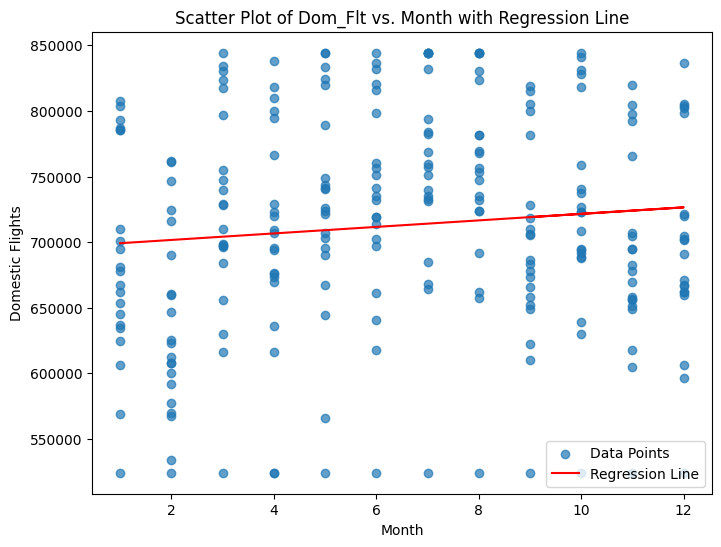

Predicted Dom_Flt for Month 6: 711569.3526600541


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
X_month = df[['Month']]
y_month = df['Dom_Flt']
X_month = X_month.dropna()
y_month = y_month[X_month.index]
# Create and train the linear regression model
model_month = LinearRegression()
model_month.fit(X_month, y_month)

# Print the slope (coefficient of Month)
print(f"Slope (coefficient of Month): {model_month.coef_[0]}")
# Scatter plot with the regression line for Month vs. Dom_Flt
plt.figure(figsize=(8, 6))
plt.scatter(df['Month'], df['Dom_Flt'], alpha=0.7, label='Data Points')
plt.plot(X_month, model_month.predict(X_month), color='red', label='Regression Line')
plt.title('Scatter Plot of Dom_Flt vs. Month with Regression Line')
plt.xlabel("Month")
plt.ylabel("Domestic Flights")
plt.legend()
plt.show()
month_to_predict = 6
predicted_dom_flt_month = model_month.predict([[month_to_predict]])
print(f"Predicted Dom_Flt for Month {month_to_predict}: {predicted_dom_flt_month[0]}")

In [24]:
from sklearn.metrics import r2_score
import statsmodels.api as sm
X = df[['Dom_Pax']]
y = df['Dom_Flt']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
print(f"Slope: {model.params['Dom_Pax']}")
print(f"Intercept: {model.params['const']}")
print(f"R-squared: {model.rsquared}")
print(f"p-value (Dom_Pax): {model.pvalues['Dom_Pax']}")
print(f"Standard error (Dom_Pax): {model.bse['Dom_Pax']}")

                            OLS Regression Results                            
Dep. Variable:                Dom_Flt   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     16.31
Date:                Wed, 07 May 2025   Prob (F-statistic):           7.17e-05
Time:                        13:18:45   Log-Likelihood:                -3179.4
No. Observations:                 250   AIC:                             6363.
Df Residuals:                     248   BIC:                             6370.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.611e+05   3.79e+04     14.816      0.0

In [37]:
X = df[['Dom_Pax']]
y = df['Dom_Flt']

# Reshape X and y
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 6678329039.364829
R-squared: 0.01722640905672379


In [39]:
y=df['Dom_Pax']
X=df['Dom_Flt']
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#Example prediction
new_dom_pax = np.array([[150]]) # Example value, replace as needed
predicted_dom_flt = model.predict(new_dom_pax)
print(f"Predicted Dom_Flt for {new_dom_pax[0][0]} Dom_Pax: {predicted_dom_flt[0][0]}")


Mean Squared Error: 59725294863520.86
R-squared: 0.03429340926034763
Predicted Dom_Flt for 150 Dom_Pax: 39173454.14840113


In [40]:
from scipy import stats
import statsmodels.api as sm

t_statistic_dom_pax, p_value_dom_pax = stats.ttest_1samp(df['Dom_Pax'], 0)

print(f"T-test for Dom_Pax:")
print(f"T-statistic: {t_statistic_dom_pax}")
print(f"P-value: {p_value_dom_pax}")
# Perform t-test for 'Int_Flt'
t_statistic_int_flt, p_value_int_flt = stats.ttest_1samp(df['Int_Flt'], 0)
print(f"\nT-test for Int_Flt:")
print(f"T-statistic: {t_statistic_int_flt}")
print(f"P-value: {p_value_int_flt}")

# Example hypothesis testing using statsmodels for 'Dom_Pax' and 'Dom_Flt'
X = df['Dom_Pax']
y = df['Dom_Flt']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\nHypothesis Testing using statsmodels:")
print(model.summary())
# Access specific values
print(f"Slope: {model.params['Dom_Pax']}")
print(f"Intercept: {model.params['const']}")
print(f"R-squared: {model.rsquared}")
print(f"p-value (Dom_Pax): {model.pvalues['Dom_Pax']}")
print(f"Standard error (Dom_Pax): {model.bse['Dom_Pax']}")

T-test for Dom_Pax:
T-statistic: 115.52097667901299
P-value: 2.704509365850922e-218

T-test for Int_Flt:
T-statistic: 120.41615440024044
P-value: 1.0538184174561657e-222

Hypothesis Testing using statsmodels:
                            OLS Regression Results                            
Dep. Variable:                Dom_Flt   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     16.31
Date:                Wed, 07 May 2025   Prob (F-statistic):           7.17e-05
Time:                        13:37:04   Log-Likelihood:                -3179.4
No. Observations:                 250   AIC:                             6363.
Df Residuals:                     248   BIC:                             6370.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
 

In [47]:
print(df['Year'].mean())
sample=df.sample(n=50)
print(sample['Year'].mean())

2012.879518072289
2012.28


In [55]:
t_statistic_year, p_value_year= stats.ttest_1samp(df['Year'], 0)
print(f"T-test for year:")
print(f"T-statistic: {t_statistic_year}")
print(f"P-value: {p_value_year}")
alpha = 0.05  # Set your significance level
if p_value_dom_pax < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in Dom_Pax from zero.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in Dom_Pax from zero.")

T-test for year:
T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: There is no statistically significant difference in Dom_Pax from zero.


In [56]:
flt_sample = df['Dom_Flt'].sample(n=50, random_state=42)
pax_sample = df['Dom_Pax'].sample(n=50, random_state=42)

# Perform t-test between the two samples
t_statistic, p_value = stats.ttest_ind(flt_sample, pax_sample)

print(f"T-test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference between the means of the two samples.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference between the means of the two samples.")


T-test Results:
T-statistic: -49.79318843293584
P-value: 2.1674578202968066e-71
Reject the null hypothesis: There is a statistically significant difference between the means of the two samples.
